# Credit Card Applications

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.



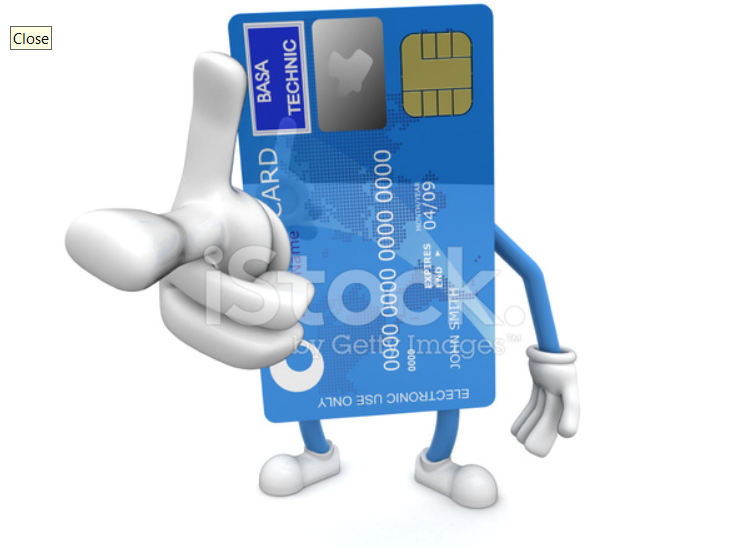

### Why it is important nowadays

There were so many uses of having credit card in today's world The benefits of credit cards do not limit to shopping on credit; instead, it helps improve your credit score. If you know how to use a credit card and how to make use of the credit period, and repay the amount used on time, you can boost your CIBIL score. This will help you obtain loans, without any difficulty in future.
they give you a unique experience through complimentary lounge access at the airports and railway stations in India and priority check-in. Other than these, you can also enjoy discounts on food in more than 280 restaurants.
Having many uses so,people are interested to take credit cards.Many people are applying for it,So it will effect the banks giving credit cards to all without checking their credit score or other things.

### How this is usefull for Banks

Predictive analytics can also be used in credit scoring applications for client banks and enterprise creditors to more accurately estimate the risk associated with a potential customer. Most credit scoring methods consider the potential customer’s credit and financial history, but this may still leave some people without credit even if they are able to pay their loan payments on time.
In order to determine a credit score, the software runs all available information about the given customer through its algorithm. It then calculates how big of a risk the bank would take if they chose to underwrite that customer.
This has the potential to allow banks to accurately score individuals who normally would not have access to credit. Those without credit histories would be able to leverage their social media activity and eCommerce internet history to show their fiscal responsibility and thus get lent to by a bank.

In this project am going to present a good predictive model.Which predicts the good credit card using different features.I hope this will usefull for banks in an efficient manner which supports the banking growth and development in todays world

### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




*   First, we will start off by loading and viewing the dataset.
*   We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.


*   We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.

*  After our data is in good shape, we will do some exploratory data analysis to build our intuitions.
*  Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.








### Loading and Viewing the dataset

In [2]:
credit_data=pd.read_csv("/content/Credit_card.csv")

credit_label=pd.read_csv("/content/Credit_card_label.csv")

## Basic Exploration of Dataset

In [3]:
#see first 20 records od data
credit_data.head(20)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0   5008827      M         Y             Y         0       180000.0   
1   5009744      F         Y             N         0       315000.0   
2   5009746      F         Y             N         0       315000.0   
3   5009749      F         Y             N         0            NaN   
4   5009752      F         Y             N         0       315000.0   
5   5009753    NaN         Y             N         0       315000.0   
6   5009754      F         Y             N         0       315000.0   
7   5009894      F         N             N         0       180000.0   
8   5010864      M         Y             Y         1       450000.0   
9   5010868      M         Y             Y         1       450000.0   
10  5010869      M         Y             Y         1       450000.0   
11  5018498      F         Y             Y         0        90000.0   
12  5018501      F         Y             Y         0            NaN   
13  5018503      F         Y             Y         0        90000.0   
14  5021303      M         N             N         1       472500.0   
15  5021310      M         N             Y         0       270000.0   
16  5021314      M         N             Y         0       270000.0   
17  5021430      F         N             Y         0       126000.0   
18  5021431      F         N             Y         0       126000.0   
19  5021998      M         N             Y         0        90000.0   

             Type_Income                      EDUCATION        Marital_status  \
0              Pensioner               Higher education               Married   
1   Commercial associate               Higher education               Married   
2   Commercial associate               Higher education               Married   
3   Commercial associate               Higher education               Married   
4   Commercial associate               Higher education               Married   
5              Pensioner               Higher education               Married   
6   Commercial associate               Higher education               Married   
7              Pensioner  Secondary / secondary special               Married   
8   Commercial associate  Secondary / secondary special               Married   
9              Pensioner  Secondary / secondary special               Married   
10  Commercial associate  Secondary / secondary special  Single / not married   
11               Working  Secondary / secondary special               Married   
12               Working  Secondary / secondary special               Married   
13               Working  Secondary / secondary special               Married   
14             Pensioner               Higher education               Married   
15               Working  Secondary / secondary special               Married   
16               Working  Secondary / secondary special  Single / not married   
17  Commercial associate               Higher education  Single / not married   
18  Commercial associate               Higher education  Single / not married   
19             Pensioner  Secondary / secondary special               Married   

         Housing_type  Birthday_count  Employed_days  Mobile_phone  \
0   House / apartment        -18772.0         365243             1   
1   House / apartment        -13557.0           -586             1   
2   House / apartment             NaN           -586             1   
3   House / apartment        -13557.0           -586             1   
4   House / apartment        -13557.0           -586             1   
5   House / apartment        -13557.0           -586             1   
6   House / apartment        -13557.0           -586             1   
7   House / apartment        -22134.0         365243             1   
8   House / apartment        -18173.0           -678             1   
9   House / apartment        -18173.0           -678             1   
10  House / apartment        -18173.0    

In [4]:
#see last 20 records of data
credit_data.tail(20)

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1528  5033520      F         Y             Y         3       180000.0   
1529  5028612      M         Y             Y         0       225000.0   
1530  5089954      M         N             Y         1       126000.0   
1531  5048642      F         N             N         0       157500.0   
1532  5125261      M         N             Y         0       157500.0   
1533  5100133      M         Y             Y         2       270000.0   
1534  5096856      M         Y             Y         0       180000.0   
1535  5089719      F         N             N         0       144000.0   
1536  5033447      F         Y             N         0       112500.0   
1537  5090942      M         N             N         0       225000.0   
1538  5125816      F         Y             N         0       450000.0   
1539  5149946      F         N             Y         0       180000.0   
1540  5024049      F         Y             Y         1       144000.0   
1541  5117065      F         N             Y         2       225000.0   
1542  5118268      M         Y             N         1       360000.0   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1528               Working  Secondary / secondary special   
1529  Commercial associate               Higher education   
1530  Commercial associate  Secondary / secondary special   
1531             Pensioner  Secondary / secondary special   
1532  Commercial associate               Higher education   
1533  Commercial associate               Higher education   
1534  Commercial associate  Secondary / secondary special   
1535               Working  Secondary / secondary special   
1536  Commercial associate               Higher education   
1537  Commercial associate  Secondary / secondary special   
1538             Pensioner               Higher education   
1539               Working               Higher education   
1540               Working               Higher education   
1541               Working               Higher education   
1542         State servant  Secondary / secondary special   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status         Housing_type  Birthday_count  \
1528               Married  Municipal apartment        -12559.0   
1529  Single / not married         With parents        -10681.0   
1530        Civil marriage    House / apartment        -12755.0   
1531             Separated    House / apartment        -24048.0   
1532               Married    House / apartment        -15423.0   
1533               Married    House / apartment        -13955.0   
1534               Married    House / apartment        -17975.0   
1535               Married    House / apartment        -19984.0   
1536               Married    House / apartment        -10828.0   
1537               Married    House / apartment        -13336.0   
1538               Married    House / apartment        -19783.0   
1539               Married    House / apartment        -22228.0   
1540               Married    House / apartment        -12903.0   
1541               Married    House / apartment             NaN   
1542               Married    House / apartment        -11294.0   
1543               Married    House / apartment        -11957.0   
1544  Single / not married    House / apartment     

In [5]:
credit_data.describe()

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members  
count     1548.000000  
mean         2.161499  
std          0.947772  
min          1.000000  
25%          2.000000  
50%          2.000000  
75%          3.000000  
max         15.000000

In [6]:
#observe any missing values in the data
credit_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [7]:
credit_data.GENDER.unique()

array(['M', 'F', nan], dtype=object)

In [8]:
credit_data.Annual_income.unique()

array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
        171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
        360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
        130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
        195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
         45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
         94500. ,  198000. ,   54000. ,  166500. ,  167400. ,  153000. ,
        423000. ,  243000. ,  283500. ,  252000. ,  495000. ,  612000. ,
         36000. ,  139500. ,  133650. ,  427500. ,  261000. ,  231750. ,
         90900. ,   45900. ,  119250. ,   58500. ,  328500. ,  787500. ,
        594000. ,  119700. ,   69372. ,   37800. , 

In [9]:
credit_data.Birthday_count.unique()

array([-18772., -13557.,     nan, ..., -10229., -15292., -16601.])

In [10]:
credit_data.Type_Occupation.unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [11]:
#renaming the columns
credit_data.rename(columns={'GENDER':'Gender','Propert_Owner':'Property_Owner','CHILDREN':'Count_Children','EDUCATION':'Education','EMAIL_ID':'Email_Id','Birthday_count':'Age_Years','Employed_days':'Years_Employed'},inplace=True)
credit_data

Ind_ID Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0     5008827      M         Y              Y               0       180000.0   
1     5009744      F         Y              N               0       315000.0   
2     5009746      F         Y              N               0       315000.0   
3     5009749      F         Y              N               0            NaN   
4     5009752      F         Y              N               0       315000.0   
...       ...    ...       ...            ...             ...            ...   
1543  5028645      F         N              Y               0            NaN   
1544  5023655      F         N              N               0       225000.0   
1545  5115992      M         Y              Y               2       180000.0   
1546  5118219      M         Y              N               0       270000.0   
1547  5053790      F         Y              Y               0       225000.0   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment   -18772.0          365243   
1                  Married  House / apartment   -13557.0            -586   
2                  Married  House / apartment        NaN            -586   
3                  Married  House / apartment   -13557.0            -586   
4                  Married  House / apartment   -13557.0            -586   
...                    ...                ...        ...             ...   
1543               Married  House / apartment   -11957.0           -2182   
1544  Single / not married  House / apartment   -10229.0           -1209   
1545               Married  House / apartment   -13174.0           -2477   
1546        Civil marriage  House / apartment   -15292.0            -645   
1547               Married  House / apartment   -16601.0           -2859   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

In [12]:
# Checking unique values greater than 0
credit_data[credit_data['Years_Employed']>0]['Years_Employed'].unique()

array([365243])

In [13]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
credit_data['Years_Employed'].replace(365243, 0, inplace=True)

In [14]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
credit_data['Years_Employed'] = abs(round(credit_data['Years_Employed']/-365,0))

In [15]:
#converting age_years columns changing days as years
credit_data['Age_Years'] = abs(round(credit_data['Age_Years']/-365,0))
credit_data


Ind_ID Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0     5008827      M         Y              Y               0       180000.0   
1     5009744      F         Y              N               0       315000.0   
2     5009746      F         Y              N               0       315000.0   
3     5009749      F         Y              N               0            NaN   
4     5009752      F         Y              N               0       315000.0   
...       ...    ...       ...            ...             ...            ...   
1543  5028645      F         N              Y               0            NaN   
1544  5023655      F         N              N               0       225000.0   
1545  5115992      M         Y              Y               2       180000.0   
1546  5118219      M         Y              N               0       270000.0   
1547  5053790      F         Y              Y               0       225000.0   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment       51.0             0.0   
1                  Married  House / apartment       37.0             2.0   
2                  Married  House / apartment        NaN             2.0   
3                  Married  House / apartment       37.0             2.0   
4                  Married  House / apartment       37.0             2.0   
...                    ...                ...        ...             ...   
1543               Married  House / apartment       33.0             6.0   
1544  Single / not married  House / apartment       28.0             3.0   
1545               Married  House / apartment       36.0             7.0   
1546        Civil marriage  House / apartment       42.0             2.0   
1547               Married  House / apartment       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

### See Outliers in data

In [16]:
# Checking unique values from Categorical Columns

for i in credit_data.columns[(credit_data.dtypes =='object').values].tolist():
    print(i,'\n')
    print(credit_data[i].value_counts())
    print('-----------------------------------------------')

Gender 

F    973
M    568
Name: Gender, dtype: int64
-----------------------------------------------
Car_Owner 

N    924
Y    624
Name: Car_Owner, dtype: int64
-----------------------------------------------
Property_Owner 

Y    1010
N     538
Name: Property_Owner, dtype: int64
-----------------------------------------------
Type_Income 

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
-----------------------------------------------
Education 

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64
-----------------------------------------------
Marital_status 

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, 

In [17]:
sns.boxplot(credit_data['Count_Children'])

<Axes: >

In [18]:
sns.boxplot(credit_data['Annual_income'])

<Axes: >

<Axes: >

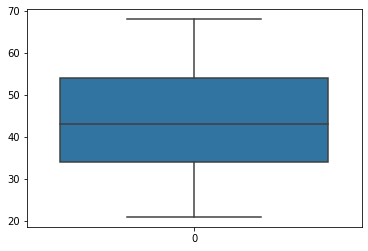

In [19]:
sns.boxplot(credit_data['Age_Years'])

In [20]:
sns.boxplot(credit_data['Years_Employed'])

<Axes: >

In [21]:
sns.boxplot(credit_data['Family_Members'])

<Axes: >

# Dealing with Missing values in data

In [22]:
credit_data.isnull().sum()

Ind_ID               0
Gender               7
Car_Owner            0
Property_Owner       0
Count_Children       0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age_Years           22
Years_Employed       0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [23]:
import missingno as msno # library to examine missing values

<Axes: >

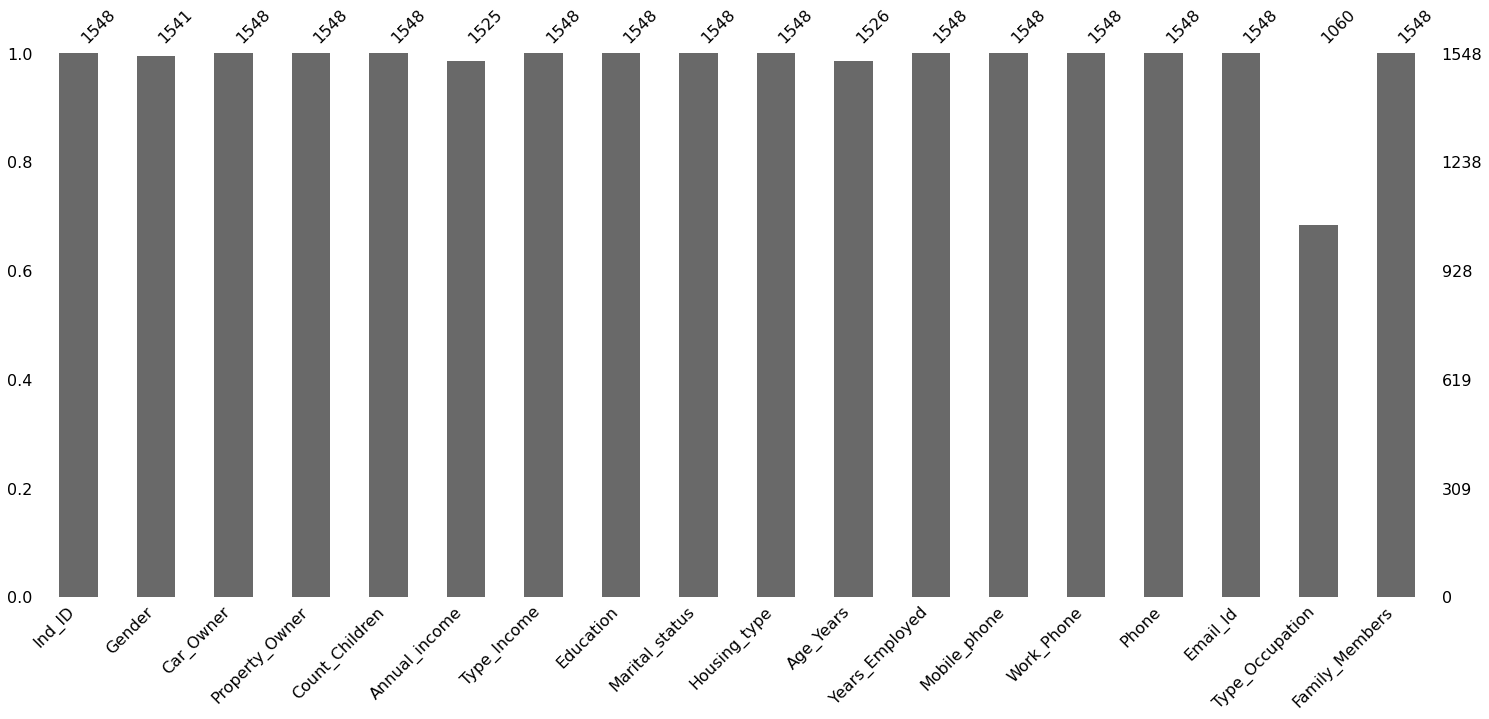

In [24]:
# creating bar plot to see the missing values
msno.bar(credit_data)

In [25]:
msno.matrix(credit_data)

<Axes: >

In [26]:
credit_label.isnull().sum()

Ind_ID    0
label     0
dtype: int64

In [27]:
credit_label.rename(columns={'label':'Status'},inplace=True)
credit_label

Ind_ID  Status
0     5008827       1
1     5009744       1
2     5009746       1
3     5009749       1
4     5009752       1
...       ...     ...
1543  5028645       0
1544  5023655       0
1545  5115992       0
1546  5118219       0
1547  5053790       0

[1548 rows x 2 columns]

In [28]:
credit_label['Status'].value_counts() #see how many approved and how many not
# 0 is application approved and 1 is application rejected.

0    1373
1     175
Name: Status, dtype: int64

In [29]:
y=credit_label['Status']   #dividing label and credit_data into X and Y
x=credit_data.drop(['Ind_ID'], axis=1)

In [30]:
y.value_counts()

0    1373
1     175
Name: Status, dtype: int64

In [31]:
x.head()

Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0      M         Y              Y               0       180000.0   
1      F         Y              N               0       315000.0   
2      F         Y              N               0       315000.0   
3      F         Y              N               0            NaN   
4      F         Y              N               0       315000.0   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Age_Years  Years_Employed  Mobile_phone  Work_Phone  Phone  Email_Id  \
0       51.0             0.0             1           0      0         0   
1       37.0             2.0             1           1      1         0   
2        NaN             2.0             1           1      1         0   
3       37.0             2.0             1           1      1         0   
4       37.0             2.0             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

### Identify numerical columns

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   Property_Owner   1548 non-null   object 
 3   Count_Children   1548 non-null   int64  
 4   Annual_income    1525 non-null   float64
 5   Type_Income      1548 non-null   object 
 6   Education        1548 non-null   object 
 7   Marital_status   1548 non-null   object 
 8   Housing_type     1548 non-null   object 
 9   Age_Years        1526 non-null   float64
 10  Years_Employed   1548 non-null   float64
 11  Mobile_phone     1548 non-null   int64  
 12  Work_Phone       1548 non-null   int64  
 13  Phone            1548 non-null   int64  
 14  Email_Id         1548 non-null   int64  
 15  Type_Occupation  1060 non-null   object 
 16  Family_Members   1548 non-null   int64  
dtypes: float64(3),

In [33]:
numerical_features = x.select_dtypes(include=['int64','float64']).columns.values
numerical_features

array(['Count_Children', 'Annual_income', 'Age_Years', 'Years_Employed',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_Id',
       'Family_Members'], dtype=object)

### Identify categorical features


In [34]:
categorical_features=x.select_dtypes(include=['object']).columns.values
categorical_features

array(['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income',
       'Education', 'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype=object)

### Imputing categorical features
Here I have used simple imputer to treat missing values in categorical features

In [35]:
from sklearn.impute import SimpleImputer
cat_impute=SimpleImputer(strategy='most_frequent')

In [36]:
x[categorical_features].head()

Gender Car_Owner Property_Owner           Type_Income         Education  \
0      M         Y              Y             Pensioner  Higher education   
1      F         Y              N  Commercial associate  Higher education   
2      F         Y              N  Commercial associate  Higher education   
3      F         Y              N  Commercial associate  Higher education   
4      F         Y              N  Commercial associate  Higher education   

  Marital_status       Housing_type Type_Occupation  
0        Married  House / apartment             NaN  
1        Married  House / apartment             NaN  
2        Married  House / apartment             NaN  
3        Married  House / apartment             NaN  
4        Married  House / apartment             NaN

In [37]:
cat_impute.fit(x[categorical_features])

SimpleImputer(strategy='most_frequent')

In [38]:
#transform and apply train data
x[categorical_features]=cat_impute.transform(x[categorical_features])

In [39]:
x[categorical_features].isnull().sum()

Gender             0
Car_Owner          0
Property_Owner     0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Type_Occupation    0
dtype: int64

In [40]:
credit_data[categorical_features]=cat_impute.transform(credit_data[categorical_features])

In [41]:
credit_data[categorical_features].isnull().sum()

Gender             0
Car_Owner          0
Property_Owner     0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Type_Occupation    0
dtype: int64

In [42]:
credit_data.isnull().sum()

Ind_ID              0
Gender              0
Car_Owner           0
Property_Owner      0
Count_Children      0
Annual_income      23
Type_Income         0
Education           0
Marital_status      0
Housing_type        0
Age_Years          22
Years_Employed      0
Mobile_phone        0
Work_Phone          0
Phone               0
Email_Id            0
Type_Occupation     0
Family_Members      0
dtype: int64

### Imputing numerical columns
Here I have used KNN imputation from sklearn library to treat missing values in numerical features

In [43]:
#declare instance 
from sklearn.impute import KNNImputer
num_impute=KNNImputer()

In [44]:
#fitting here
x[numerical_features].head()

Count_Children  Annual_income  Age_Years  Years_Employed  Mobile_phone  \
0               0       180000.0       51.0             0.0             1   
1               0       315000.0       37.0             2.0             1   
2               0       315000.0        NaN             2.0             1   
3               0            NaN       37.0             2.0             1   
4               0       315000.0       37.0             2.0             1   

   Work_Phone  Phone  Email_Id  Family_Members  
0           0      0         0               2  
1           1      1         0               2  
2           1      1         0               2  
3           1      1         0               2  
4           1      1         0               2

In [45]:
num_impute.fit(x[numerical_features])

KNNImputer()

In [46]:
#transform and apply test data 
x[numerical_features]=num_impute.transform(x[numerical_features])

In [47]:
#transform and apply train data
credit_data[numerical_features]=num_impute.transform(credit_data[numerical_features])

In [48]:
x[numerical_features].isnull().sum()

Count_Children    0
Annual_income     0
Age_Years         0
Years_Employed    0
Mobile_phone      0
Work_Phone        0
Phone             0
Email_Id          0
Family_Members    0
dtype: int64

In [49]:
credit_data.Annual_income.unique()

array([ 180000. ,  315000. ,  450000. ,   90000. ,  178650. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        116100. ,  292500. ,  135000. ,   76500. ,  215100. ,  225000. ,
         67500. ,  171000. ,  103500. ,   99000. ,  147600. ,  391500. ,
         65250. ,   72900. ,  155700. ,  360000. ,  256500. ,  675000. ,
        247500. ,   85500. ,  121500. ,  207900. ,  130500. ,  162000. ,
        211500. ,   81000. ,   72000. ,  148500. ,  195750. ,  585000. ,
        324900. ,  216000. ,  306000. ,  108000. ,   63000. ,   45000. ,
        157050. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,  187920. ,   67050. ,   73350. ,  193500. ,
        900000. ,  173430. ,   94500. ,  198000. ,   54000. ,  166500. ,
        151200. ,  167400. ,  153000. ,  423000. ,  243000. ,  283500. ,
        207000. ,  252000. ,  495000. ,  612000. ,   36000. ,  139500. ,
        133650. ,  427500. ,  177300. ,  261000. , 

## Dealing With Outliers in dataset

In [50]:
credit_data['Annual_income'].describe()

count    1.548000e+03
mean     1.913384e+05
std      1.125857e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

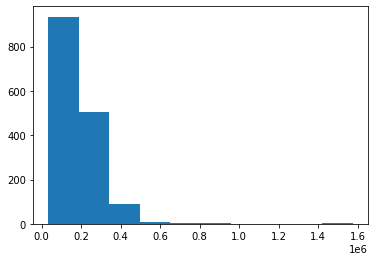

In [51]:
plt.hist(credit_data['Annual_income'])  #before dealing with outliers 
plt.show

In [52]:
IQR=credit_data.Annual_income.quantile(0.75) - credit_data.Annual_income.quantile(0.25)
IQR

103500.0

In [53]:
lower_bridge=credit_data['Annual_income'].quantile(0.25)-(IQR*3)
upper_bridge=credit_data['Annual_income'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-189000.0
535500.0


In [54]:
credit_data.loc[credit_data['Annual_income']>=535500.0,'Annual_income']=535500.0


<function matplotlib.pyplot.show(close=None, block=None)>

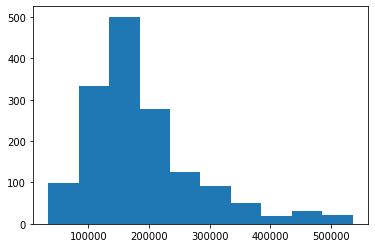

In [55]:
plt.hist(credit_data['Annual_income'])  #after dealing with outliers 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

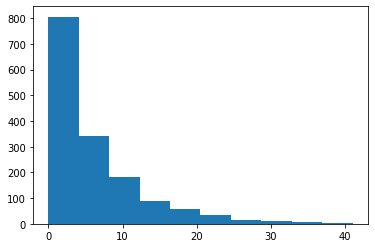

In [56]:
plt.hist(credit_data['Years_Employed'])
plt.show

In [57]:
credit_data['Years_Employed'].describe()

count    1548.000000
mean        6.071059
std         6.591026
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        41.000000
Name: Years_Employed, dtype: float64

In [58]:
IQR=credit_data.Years_Employed.quantile(0.75) - credit_data.Years_Employed.quantile(0.25)
IQR

8.0

In [59]:
lower_bridge=credit_data['Years_Employed'].quantile(0.25)-(IQR*1.5)
upper_bridge=credit_data['Years_Employed'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-11.0
21.0


In [60]:
credit_data.loc[credit_data['Years_Employed']>=21.0,'Years_Employed']=21.0



In [61]:
plt.hist(credit_data['Years_Employed'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [62]:
sns.boxplot(credit_data['Years_Employed'])  #this is done after dealing with outliers

<Axes: >

In [63]:
plt.hist(credit_data['Count_Children'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [64]:
credit_data['Count_Children'].describe()

count    1548.000000
mean        0.412791
std         0.776691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: Count_Children, dtype: float64

In [65]:
IQR=credit_data.Count_Children.quantile(0.75) - credit_data.Count_Children.quantile(0.25)
IQR

1.0

In [66]:
lower_bridge=credit_data['Count_Children'].quantile(0.25)-(IQR*1.5)
upper_bridge=credit_data['Count_Children'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1.5
2.5


In [67]:
credit_data.loc[credit_data['Count_Children']>=2.5,'Count_Children']=2.5


<Axes: >

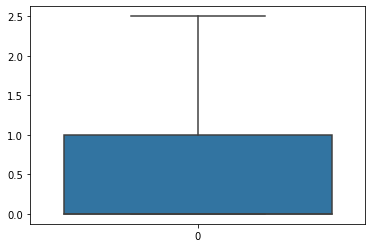

In [68]:
sns.boxplot(credit_data['Count_Children'])

<function matplotlib.pyplot.show(close=None, block=None)>

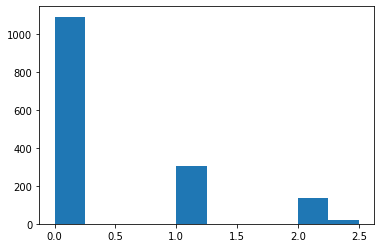

In [69]:
plt.hist(credit_data['Count_Children'])  #after dealing with outliers  this is the box plot
plt.show

In [70]:
credit_data['Family_Members'].describe()

count    1548.000000
mean        2.161499
std         0.947772
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family_Members, dtype: float64

<Axes: >

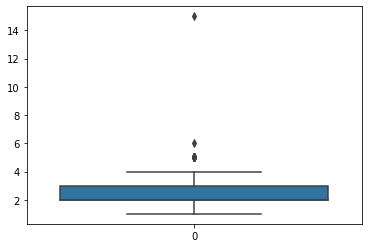

In [71]:
sns.boxplot(credit_data['Family_Members'])

In [72]:
plt.hist(credit_data['Family_Members'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [73]:
IQR=credit_data.Family_Members.quantile(0.75) - credit_data.Family_Members.quantile(0.25)
IQR

1.0

In [74]:
lower_bridge=credit_data['Family_Members'].quantile(0.25)-(IQR*1.5)
upper_bridge=credit_data['Family_Members'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

0.5
4.5


In [75]:
credit_data.loc[credit_data['Family_Members']>=4.5,'Family_Members']=4.5


In [76]:
sns.boxplot(credit_data['Family_Members'])

<Axes: >

In [77]:
plt.hist(credit_data['Family_Members'])  #this is histogram after dealing with outliers
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [78]:
credit_data.isnull().sum()

Ind_ID             0
Gender             0
Car_Owner          0
Property_Owner     0
Count_Children     0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age_Years          0
Years_Employed     0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
dtype: int64

## Merging two dataframes

In [79]:
# merging the two datasets based on 'ID'
final_df = pd.merge(credit_data, credit_label, on='Ind_ID', how='inner')
final_df.head()

Ind_ID Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0  5008827      M         Y              Y             0.0       180000.0   
1  5009744      F         Y              N             0.0       315000.0   
2  5009746      F         Y              N             0.0       315000.0   
3  5009749      F         Y              N             0.0       315000.0   
4  5009752      F         Y              N             0.0       315000.0   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Age_Years  Years_Employed  Mobile_phone  Work_Phone  Phone  Email_Id  \
0       51.0             0.0           1.0         0.0    0.0       0.0   
1       37.0             2.0           1.0         1.0    1.0       0.0   
2       37.0             2.0           1.0         1.0    1.0       0.0   
3       37.0             2.0           1.0         1.0    1.0       0.0   
4       37.0             2.0           1.0         1.0    1.0       0.0   

  Type_Occupation  Family_Members  Status  
0        Laborers             2.0       1  
1        Laborers             2.0       1  
2        Laborers             2.0       1  
3        Laborers             2.0       1  
4        Laborers             2.0       1

In [80]:
final_df.shape

(1548, 19)

In [81]:
final_df.describe()

Ind_ID  Count_Children  Annual_income    Age_Years  \
count  1.548000e+03     1548.000000    1548.000000  1548.000000   
mean   5.078920e+06        0.399225  188320.944767    43.965891   
std    4.171759e+04        0.675922   93407.319780    11.561382   
min    5.008827e+06        0.000000   33750.000000    21.000000   
25%    5.045070e+06        0.000000  121500.000000    34.000000   
50%    5.078842e+06        0.000000  166500.000000    43.000000   
75%    5.115673e+06        1.000000  225000.000000    54.000000   
max    5.150412e+06        2.500000  535500.000000    68.000000   

       Years_Employed  Mobile_phone   Work_Phone        Phone     Email_Id  \
count     1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean         5.837209           1.0     0.208010     0.309432     0.092377   
std          5.834442           0.0     0.406015     0.462409     0.289651   
min          0.000000           1.0     0.000000     0.000000     0.000000   
25%          1.000000           1.0     0.000000     0.000000     0.000000   
50%          4.000000           1.0     0.000000     0.000000     0.000000   
75%          9.000000           1.0     0.000000     1.000000     0.000000   
max         21.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members       Status  
count     1548.000000  1548.000000  
mean         2.148902     0.113049  
std          0.874078     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max          4.500000     1.000000

In [82]:
final_df.isnull().sum()

Ind_ID             0
Gender             0
Car_Owner          0
Property_Owner     0
Count_Children     0
Annual_income      0
Type_Income        0
Education          0
Marital_status     0
Housing_type       0
Age_Years          0
Years_Employed     0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_Id           0
Type_Occupation    0
Family_Members     0
Status             0
dtype: int64

## **Visualization:**

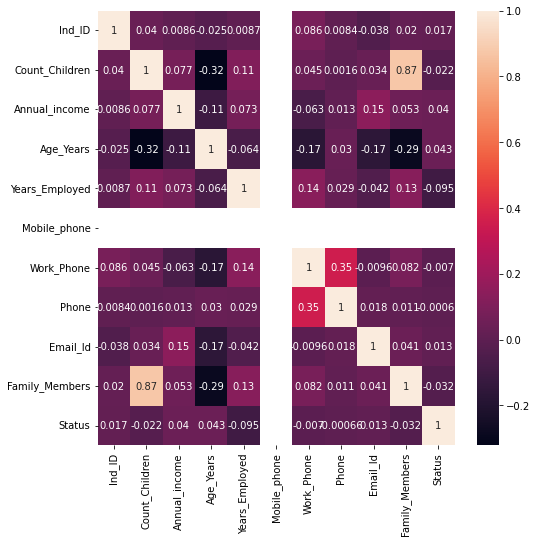

In [83]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [84]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(final_df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

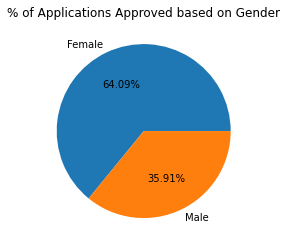

In [85]:
# This graph shows that, majority of application are approved for Female's
plt.pie(final_df[final_df['Status']==0]['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

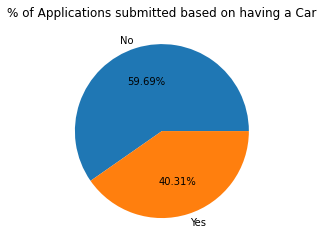

In [86]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_df['Car_Owner'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on having a Car')
plt.show()

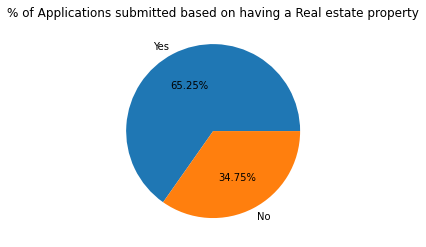

In [87]:
# This graph shows that, majority of applicatant's own a  property / House
plt.pie(final_df['Property_Owner'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on having a Real estate property')
plt.show()

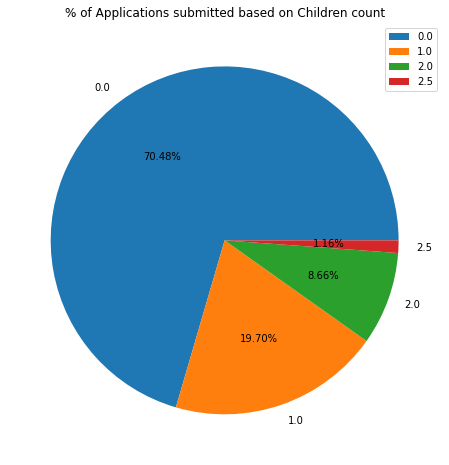

In [88]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['Count_Children'].value_counts(), labels=final_df['Count_Children'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

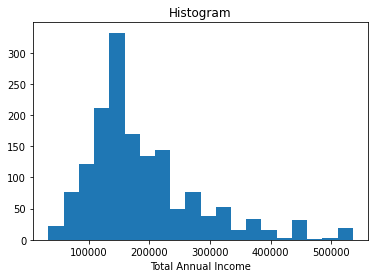

In [89]:
# This graph shows that, majority of applicatant's income lies between 1 to 5 lakh
plt.hist(final_df['Annual_income'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

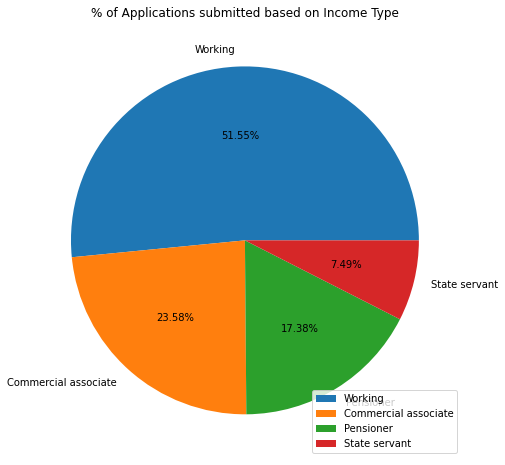

In [90]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['Type_Income'].value_counts(), labels=final_df['Type_Income'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

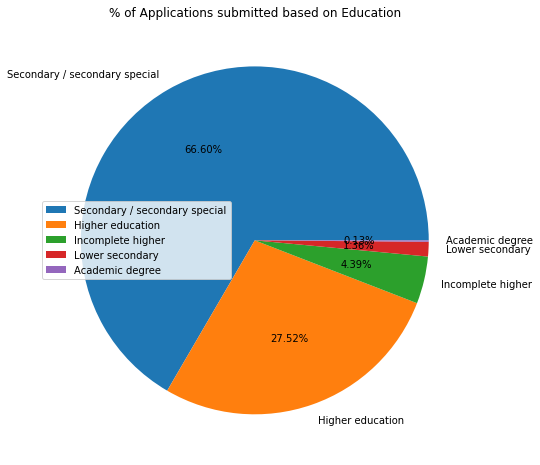

In [91]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['Education'].value_counts(), labels=final_df['Education'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

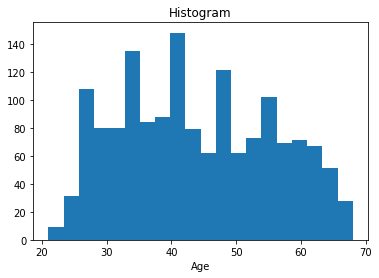

In [92]:
#This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(final_df['Age_Years'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

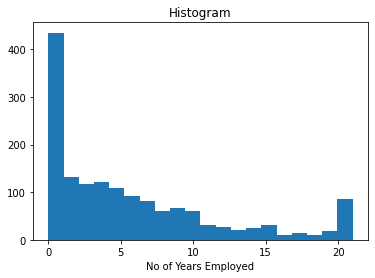

In [93]:
# This graph shows that, majority of applicatant's are Employed for 0 to 5 years
plt.hist(final_df['Years_Employed'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

# Converting categorical columns into Numerical
Here I used some techniques to deal with categorical columns.I have used mapping for having two values like yes or no and label encoding which is used to change categorical into numerical when there is no relation between the categories we can use this encoding, ordinal which is used when categorical values have some order here I used on Education column Which has order.

In [94]:
final_df

Ind_ID Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0     5008827      M         Y              Y             0.0       180000.0   
1     5009744      F         Y              N             0.0       315000.0   
2     5009746      F         Y              N             0.0       315000.0   
3     5009749      F         Y              N             0.0       315000.0   
4     5009752      F         Y              N             0.0       315000.0   
...       ...    ...       ...            ...             ...            ...   
1543  5028645      F         N              Y             0.0       208800.0   
1544  5023655      F         N              N             0.0       225000.0   
1545  5115992      M         Y              Y             2.0       180000.0   
1546  5118219      M         Y              N             0.0       270000.0   
1547  5053790      F         Y              Y             0.0       225000.0   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment       51.0             0.0   
1                  Married  House / apartment       37.0             2.0   
2                  Married  House / apartment       37.0             2.0   
3                  Married  House / apartment       37.0             2.0   
4                  Married  House / apartment       37.0             2.0   
...                    ...                ...        ...             ...   
1543               Married  House / apartment       33.0             6.0   
1544  Single / not married  House / apartment       28.0             3.0   
1545               Married  House / apartment       36.0             7.0   
1546        Civil marriage  House / apartment       42.0             2.0   
1547               Married  House / apartment       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0              1.0         0.0    0.0       0.0        Laborers   
1              1.0         1.0    1.0       0.0        Laborers   
2              1.0         1.0    1.0       0.0        Laborers   
3              1.0         1.0    1.0       0.0        Laborers   
4              1.0         1.0    1.0       0.0        Laborers   
...            ...         ...    ...       ...             ...   
1543           1.0         0.0    0.0       0.0        Managers   
1544           1.0         0.0    0.0       0.0     Accountants   
1545           1.0         0.0    0.0       0.0        Managers   
1546           1.0         1.0    1.0       0.0         Drivers   
1547           1.0         0.0    0.0       0.0        Laborers   

      Family_Members  Status  
0                2.0       1  
1                2.0       1  
2                2.0       1  
3                2.0       1  
4                2.0       1  
...              ...     ...  
1543             2.0       0  
1544             1.0       0  
1545             4.0       0  
1546             2.0       0  
1547             2.0       0  

[1548 rows x 19 columns]

In [95]:
#see what are categorical columns
categorical_features

array(['Gender', 'Car_Owner', 'Property_Owner', 'Type_Income',
       'Education', 'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype=object)

In [96]:
final_df.Gender.unique()

array(['M', 'F'], dtype=object)

In [97]:
final_df

Ind_ID Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0     5008827      M         Y              Y             0.0       180000.0   
1     5009744      F         Y              N             0.0       315000.0   
2     5009746      F         Y              N             0.0       315000.0   
3     5009749      F         Y              N             0.0       315000.0   
4     5009752      F         Y              N             0.0       315000.0   
...       ...    ...       ...            ...             ...            ...   
1543  5028645      F         N              Y             0.0       208800.0   
1544  5023655      F         N              N             0.0       225000.0   
1545  5115992      M         Y              Y             2.0       180000.0   
1546  5118219      M         Y              N             0.0       270000.0   
1547  5053790      F         Y              Y             0.0       225000.0   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment       51.0             0.0   
1                  Married  House / apartment       37.0             2.0   
2                  Married  House / apartment       37.0             2.0   
3                  Married  House / apartment       37.0             2.0   
4                  Married  House / apartment       37.0             2.0   
...                    ...                ...        ...             ...   
1543               Married  House / apartment       33.0             6.0   
1544  Single / not married  House / apartment       28.0             3.0   
1545               Married  House / apartment       36.0             7.0   
1546        Civil marriage  House / apartment       42.0             2.0   
1547               Married  House / apartment       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0              1.0         0.0    0.0       0.0        Laborers   
1              1.0         1.0    1.0       0.0        Laborers   
2              1.0         1.0    1.0       0.0        Laborers   
3              1.0         1.0    1.0       0.0        Laborers   
4              1.0         1.0    1.0       0.0        Laborers   
...            ...         ...    ...       ...             ...   
1543           1.0         0.0    0.0       0.0        Managers   
1544           1.0         0.0    0.0       0.0     Accountants   
1545           1.0         0.0    0.0       0.0        Managers   
1546           1.0         1.0    1.0       0.0         Drivers   
1547           1.0         0.0    0.0       0.0        Laborers   

      Family_Members  Status  
0                2.0       1  
1                2.0       1  
2                2.0       1  
3                2.0       1  
4                2.0       1  
...              ...     ...  
1543             2.0       0  
1544             1.0       0  
1545             4.0       0  
1546             2.0       0  
1547             2.0       0  

[1548 rows x 19 columns]

In [98]:
#converting gender column into neumerical as male as 0 and female as 1 and car_owner clm like yes as 1 and no as 0 and property owner is also
final_df['Gender'] = final_df.Gender.map({'M':0,'F':1})
final_df['Car_Owner'] = final_df.Car_Owner.map({'Y':1,'N':0})
final_df['Property_Owner'] = final_df.Property_Owner.map({'Y':1,'N':0})


In [99]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income           Type_Income                      Education  \
0          180000.0             Pensioner               Higher education   
1          315000.0  Commercial associate               Higher education   
2          315000.0  Commercial associate               Higher education   
3          315000.0  Commercial associate               Higher education   
4          315000.0  Commercial associate               Higher education   
...             ...                   ...                            ...   
1543       208800.0  Commercial associate               Higher education   
1544       225000.0  Commercial associate              Incomplete higher   
1545       180000.0               Working               Higher education   
1546       270000.0               Working  Secondary / secondary special   
1547       225000.0               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment       51.0             0.0   
1                  Married  House / apartment       37.0             2.0   
2                  Married  House / apartment       37.0             2.0   
3                  Married  House / apartment       37.0             2.0   
4                  Married  House / apartment       37.0             2.0   
...                    ...                ...        ...             ...   
1543               Married  House / apartment       33.0             6.0   
1544  Single / not married  House / apartment       28.0             3.0   
1545               Married  House / apartment       36.0             7.0   
1546        Civil marriage  House / apartment       42.0             2.0   
1547               Married  House / apartment       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0              1.0         0.0    0.0       0.0        Laborers   
1              1.0         1.0    1.0       0.0        Laborers   
2              1.0         1.0    1.0       0.0        Laborers   
3              1.0         1.0    1.0       0.0        Laborers   
4              1.0         1.0    1.0       0.0        Laborers   
...            ...         ...    ...       ...             ...   
1543           1.0         0.0    0.0       0.0        Managers   
1544           1.0         0.0    0.0       0.0     Accountants   
1545           1.0         0.0    0.0       0.0        Managers   
1546           1.0         1.0    1.0       0.0         Drivers   
1547           1.0         0.0    0.0       0.0        Laborers   

      Family_Members  Status  
0                2.0       1  
1                2.0       1  
2                2.0       1  
3                2.0       1  
4                2.0       1  
...              ...     ...  
1543             2.0       0  
1544             1.0       0  
1545             4.0       0  
1546             2.0       0  
1547             2.0       0  

[1548 rows x 19 columns]

In [100]:
final_df=final_df.drop(['Status'],axis=1)

In [101]:
final_df.Type_Income.value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [102]:
#for type_income we are using label encoding
from sklearn.preprocessing import LabelEncoder

In [103]:
#loading label encoder
label_encode=LabelEncoder()

In [104]:
labels=label_encode.fit_transform(final_df.Type_Income)

In [105]:
#appending the labels to dataframe
final_df['Income_Type']=labels

Label encoding done on type_income so labels alotted in alphabetical order
*  commercial associate--> 0

*  Pensioner-->  1
*  State servant--> 2
*  Working--> 3





In [106]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income           Type_Income                      Education  \
0          180000.0             Pensioner               Higher education   
1          315000.0  Commercial associate               Higher education   
2          315000.0  Commercial associate               Higher education   
3          315000.0  Commercial associate               Higher education   
4          315000.0  Commercial associate               Higher education   
...             ...                   ...                            ...   
1543       208800.0  Commercial associate               Higher education   
1544       225000.0  Commercial associate              Incomplete higher   
1545       180000.0               Working               Higher education   
1546       270000.0               Working  Secondary / secondary special   
1547       225000.0               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment       51.0             0.0   
1                  Married  House / apartment       37.0             2.0   
2                  Married  House / apartment       37.0             2.0   
3                  Married  House / apartment       37.0             2.0   
4                  Married  House / apartment       37.0             2.0   
...                    ...                ...        ...             ...   
1543               Married  House / apartment       33.0             6.0   
1544  Single / not married  House / apartment       28.0             3.0   
1545               Married  House / apartment       36.0             7.0   
1546        Civil marriage  House / apartment       42.0             2.0   
1547               Married  House / apartment       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0              1.0         0.0    0.0       0.0        Laborers   
1              1.0         1.0    1.0       0.0        Laborers   
2              1.0         1.0    1.0       0.0        Laborers   
3              1.0         1.0    1.0       0.0        Laborers   
4              1.0         1.0    1.0       0.0        Laborers   
...            ...         ...    ...       ...             ...   
1543           1.0         0.0    0.0       0.0        Managers   
1544           1.0         0.0    0.0       0.0     Accountants   
1545           1.0         0.0    0.0       0.0        Managers   
1546           1.0         1.0    1.0       0.0         Drivers   
1547           1.0         0.0    0.0       0.0        Laborers   

      Family_Members  Income_Type  
0                2.0            1  
1                2.0            0  
2                2.0            0  
3                2.0            0  
4                2.0            0  
...              ...          ...  
1543             2.0            0  
1544             1.0            0  
1545             4.0            3  
1546             2.0            3  
1547             2.0            3  

[1548 rows x 19 columns]

In [107]:
#dropping type_income column
final_df=final_df.drop(['Type_Income'],axis=1)

In [108]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income                      Education        Marital_status  \
0          180000.0               Higher education               Married   
1          315000.0               Higher education               Married   
2          315000.0               Higher education               Married   
3          315000.0               Higher education               Married   
4          315000.0               Higher education               Married   
...             ...                            ...                   ...   
1543       208800.0               Higher education               Married   
1544       225000.0              Incomplete higher  Single / not married   
1545       180000.0               Higher education               Married   
1546       270000.0  Secondary / secondary special        Civil marriage   
1547       225000.0               Higher education               Married   

           Housing_type  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0     House / apartment       51.0             0.0           1.0         0.0   
1     House / apartment       37.0             2.0           1.0         1.0   
2     House / apartment       37.0             2.0           1.0         1.0   
3     House / apartment       37.0             2.0           1.0         1.0   
4     House / apartment       37.0             2.0           1.0         1.0   
...                 ...        ...             ...           ...         ...   
1543  House / apartment       33.0             6.0           1.0         0.0   
1544  House / apartment       28.0             3.0           1.0         0.0   
1545  House / apartment       36.0             7.0           1.0         0.0   
1546  House / apartment       42.0             2.0           1.0         1.0   
1547  House / apartment       45.0             8.0           1.0         0.0   

      Phone  Email_Id Type_Occupation  Family_Members  Income_Type  
0       0.0       0.0        Laborers             2.0            1  
1       1.0       0.0        Laborers             2.0            0  
2       1.0       0.0        Laborers             2.0            0  
3       1.0       0.0        Laborers             2.0            0  
4       1.0       0.0        Laborers             2.0            0  
...     ...       ...             ...             ...          ...  
1543    0.0       0.0        Managers             2.0            0  
1544    0.0       0.0     Accountants             1.0            0  
1545    0.0       0.0        Managers             4.0            3  
1546    1.0       0.0         Drivers             2.0            3  
1547    0.0       0.0        Laborers             2.0            3  

[1548 rows x 18 columns]

In [109]:
final_df.Marital_status.value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [110]:
#loading label encoder
label_encode=LabelEncoder()

In [111]:
marital_labels=label_encode.fit_transform(final_df.Marital_status)

In [112]:
#appending the labels to dataframe
final_df['mary_status'] = marital_labels

In [113]:
final_df.mary_status.value_counts()

1    1049
3     227
0     101
2      96
4      75
Name: mary_status, dtype: int64

Label encoding done on Marital_status as
*  Civil marriage--> 0
*  Married --> 1
*  Separated--> 2
*  Single/not married-->3
*  Widow--> 4








In [114]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income                      Education        Marital_status  \
0          180000.0               Higher education               Married   
1          315000.0               Higher education               Married   
2          315000.0               Higher education               Married   
3          315000.0               Higher education               Married   
4          315000.0               Higher education               Married   
...             ...                            ...                   ...   
1543       208800.0               Higher education               Married   
1544       225000.0              Incomplete higher  Single / not married   
1545       180000.0               Higher education               Married   
1546       270000.0  Secondary / secondary special        Civil marriage   
1547       225000.0               Higher education               Married   

           Housing_type  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0     House / apartment       51.0             0.0           1.0         0.0   
1     House / apartment       37.0             2.0           1.0         1.0   
2     House / apartment       37.0             2.0           1.0         1.0   
3     House / apartment       37.0             2.0           1.0         1.0   
4     House / apartment       37.0             2.0           1.0         1.0   
...                 ...        ...             ...           ...         ...   
1543  House / apartment       33.0             6.0           1.0         0.0   
1544  House / apartment       28.0             3.0           1.0         0.0   
1545  House / apartment       36.0             7.0           1.0         0.0   
1546  House / apartment       42.0             2.0           1.0         1.0   
1547  House / apartment       45.0             8.0           1.0         0.0   

      Phone  Email_Id Type_Occupation  Family_Members  Income_Type  \
0       0.0       0.0        Laborers             2.0            1   
1       1.0       0.0        Laborers             2.0            0   
2       1.0       0.0        Laborers             2.0            0   
3       1.0       0.0        Laborers             2.0            0   
4       1.0       0.0        Laborers             2.0            0   
...     ...       ...             ...             ...          ...   
1543    0.0       0.0        Managers             2.0            0   
1544    0.0       0.0     Accountants             1.0            0   
1545    0.0       0.0        Managers             4.0            3   
1546    1.0       0.0         Drivers             2.0            3   
1547    0.0       0.0        Laborers             2.0            3   

      mary_status  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
1543            1  
1544            3  
1545            1  
1546            0  
1547            1  

[1548 rows x 19 columns]

In [115]:
final_df=final_df.drop(['Marital_status'],axis=1)

In [116]:
final_df.Housing_type.value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [117]:
#loading label encoder
label_encode=LabelEncoder()

In [118]:
Housing_labels=label_encode.fit_transform(final_df.Housing_type)

In [119]:
#appending the labels to dataframe
final_df['Type_House'] = Housing_labels

In [120]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income                      Education       Housing_type  \
0          180000.0               Higher education  House / apartment   
1          315000.0               Higher education  House / apartment   
2          315000.0               Higher education  House / apartment   
3          315000.0               Higher education  House / apartment   
4          315000.0               Higher education  House / apartment   
...             ...                            ...                ...   
1543       208800.0               Higher education  House / apartment   
1544       225000.0              Incomplete higher  House / apartment   
1545       180000.0               Higher education  House / apartment   
1546       270000.0  Secondary / secondary special  House / apartment   
1547       225000.0               Higher education  House / apartment   

      Age_Years  Years_Employed  Mobile_phone  Work_Phone  Phone  Email_Id  \
0          51.0             0.0           1.0         0.0    0.0       0.0   
1          37.0             2.0           1.0         1.0    1.0       0.0   
2          37.0             2.0           1.0         1.0    1.0       0.0   
3          37.0             2.0           1.0         1.0    1.0       0.0   
4          37.0             2.0           1.0         1.0    1.0       0.0   
...         ...             ...           ...         ...    ...       ...   
1543       33.0             6.0           1.0         0.0    0.0       0.0   
1544       28.0             3.0           1.0         0.0    0.0       0.0   
1545       36.0             7.0           1.0         0.0    0.0       0.0   
1546       42.0             2.0           1.0         1.0    1.0       0.0   
1547       45.0             8.0           1.0         0.0    0.0       0.0   

     Type_Occupation  Family_Members  Income_Type  mary_status  Type_House  
0           Laborers             2.0            1            1           1  
1           Laborers             2.0            0            1           1  
2           Laborers             2.0            0            1           1  
3           Laborers             2.0            0            1           1  
4           Laborers             2.0            0            1           1  
...              ...             ...          ...          ...         ...  
1543        Managers             2.0            0            1           1  
1544     Accountants             1.0            0            3           1  
1545        Managers             4.0            3            1           1  
1546         Drivers             2.0            3            0           1  
1547        Laborers             2.0            3            1           1  

[1548 rows x 19 columns]

Label Encoding was done on Housing_Type as 
*   House / apartment -->1              
*   With parents      -->5
*   Municipal apartment-->2
*   Rented apartment   -->4
*   Office apartment   -->3
*   Co-op apartment    -->0



In [121]:
final_df=final_df.drop(['Housing_type'],axis=1)

ordinal encoding on Education as 
*   Academic degree -->2
*   Higher Education-->4
*   Incomplete Higher-->3
*   Secondary/secondary type-->1
*   Lower secondary  -->0









In [122]:
final_df.Education.unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [123]:
from sklearn.preprocessing import OrdinalEncoder

In [124]:
oe=OrdinalEncoder(categories=[['Lower secondary','Secondary / secondary special','Academic degree','Incomplete higher','Higher education']],dtype=np.int64)

In [125]:
Edu_labels=oe.fit_transform(final_df[['Education']])

In [126]:
Edu_labels

array([[4],
       [4],
       [4],
       ...,
       [4],
       [1],
       [4]])

In [127]:
final_df['Educ_Qualification']=Edu_labels

In [128]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income                      Education  Age_Years  Years_Employed  \
0          180000.0               Higher education       51.0             0.0   
1          315000.0               Higher education       37.0             2.0   
2          315000.0               Higher education       37.0             2.0   
3          315000.0               Higher education       37.0             2.0   
4          315000.0               Higher education       37.0             2.0   
...             ...                            ...        ...             ...   
1543       208800.0               Higher education       33.0             6.0   
1544       225000.0              Incomplete higher       28.0             3.0   
1545       180000.0               Higher education       36.0             7.0   
1546       270000.0  Secondary / secondary special       42.0             2.0   
1547       225000.0               Higher education       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0              1.0         0.0    0.0       0.0        Laborers   
1              1.0         1.0    1.0       0.0        Laborers   
2              1.0         1.0    1.0       0.0        Laborers   
3              1.0         1.0    1.0       0.0        Laborers   
4              1.0         1.0    1.0       0.0        Laborers   
...            ...         ...    ...       ...             ...   
1543           1.0         0.0    0.0       0.0        Managers   
1544           1.0         0.0    0.0       0.0     Accountants   
1545           1.0         0.0    0.0       0.0        Managers   
1546           1.0         1.0    1.0       0.0         Drivers   
1547           1.0         0.0    0.0       0.0        Laborers   

      Family_Members  Income_Type  mary_status  Type_House  Educ_Qualification  
0                2.0            1            1           1                   4  
1                2.0            0            1           1                   4  
2                2.0            0            1           1                   4  
3                2.0            0            1           1                   4  
4                2.0            0            1           1                   4  
...              ...          ...          ...         ...                 ...  
1543             2.0            0            1           1                   4  
1544             1.0            0            3           1                   3  
1545             4.0            3            1           1                   4  
1546             2.0            3            0           1                   1  
1547             2.0            3            1           1                   4  

[1548 rows x 19 columns]

In [129]:
#dropping education column
final_df=final_df.drop(['Education'],axis=1)

In [130]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id Type_Occupation  Family_Members  Income_Type  \
0       0.0       0.0        Laborers             2.0            1   
1       1.0       0.0        Laborers             2.0            0   
2       1.0       0.0        Laborers             2.0            0   
3       1.0       0.0        Laborers             2.0            0   
4       1.0       0.0        Laborers             2.0            0   
...     ...       ...             ...             ...          ...   
1543    0.0       0.0        Managers             2.0            0   
1544    0.0       0.0     Accountants             1.0            0   
1545    0.0       0.0        Managers             4.0            3   
1546    1.0       0.0         Drivers             2.0            3   
1547    0.0       0.0        Laborers             2.0            3   

      mary_status  Type_House  Educ_Qualification  
0               1           1                   4  
1               1           1                   4  
2               1           1                   4  
3               1           1                   4  
4               1           1                   4  
...           ...         ...                 ...  
1543            1           1                   4  
1544            3           1                   3  
1545            1           1                   4  
1546            0           1                   1  
1547            1           1                   4  

[1548 rows x 18 columns]

# Label encoding was done on type_occupation as 
* Laborers -->  8
* Core staff --> 3
* Managers   --> 10
* Sales staff--> 14
* Drivers  --> 4
* High skill tech staff --> 6
* Medicine staff  -->  11
* Accountants  --> 0
* Security staff--> 16
* Cleaning staff--> 1
* Cooking staff  --> 2
* Private service staff  --> 12
* Secretaries   -->  15
* Low-skill Laborers -->  9
* Waiters/barmen staff  -->  17
* HR staff   -->  5
* IT staff   -->  7
* Realty agents  --> 13


In [131]:
final_df.Type_Occupation.value_counts()

Laborers                 756
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [132]:
#loading label encoder
label_encode=LabelEncoder()

In [133]:
Occupation_labels=label_encode.fit_transform(final_df.Type_Occupation)

In [134]:
#appending the labels to dataframe
final_df['Occupation_Type'] = Occupation_labels

In [135]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id Type_Occupation  Family_Members  Income_Type  \
0       0.0       0.0        Laborers             2.0            1   
1       1.0       0.0        Laborers             2.0            0   
2       1.0       0.0        Laborers             2.0            0   
3       1.0       0.0        Laborers             2.0            0   
4       1.0       0.0        Laborers             2.0            0   
...     ...       ...             ...             ...          ...   
1543    0.0       0.0        Managers             2.0            0   
1544    0.0       0.0     Accountants             1.0            0   
1545    0.0       0.0        Managers             4.0            3   
1546    1.0       0.0         Drivers             2.0            3   
1547    0.0       0.0        Laborers             2.0            3   

      mary_status  Type_House  Educ_Qualification  Occupation_Type  
0               1           1                   4                8  
1               1           1                   4                8  
2               1           1                   4                8  
3               1           1                   4                8  
4               1           1                   4                8  
...           ...         ...                 ...              ...  
1543            1           1                   4               10  
1544            3           1                   3                0  
1545            1           1                   4               10  
1546            0           1                   1                4  
1547            1           1                   4                8  

[1548 rows x 19 columns]

In [136]:
final_df=final_df.drop(['Type_Occupation'],axis=1)

In [137]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id  Family_Members  Income_Type  mary_status  Type_House  \
0       0.0       0.0             2.0            1            1           1   
1       1.0       0.0             2.0            0            1           1   
2       1.0       0.0             2.0            0            1           1   
3       1.0       0.0             2.0            0            1           1   
4       1.0       0.0             2.0            0            1           1   
...     ...       ...             ...          ...          ...         ...   
1543    0.0       0.0             2.0            0            1           1   
1544    0.0       0.0             1.0            0            3           1   
1545    0.0       0.0             4.0            3            1           1   
1546    1.0       0.0             2.0            3            0           1   
1547    0.0       0.0             2.0            3            1           1   

      Educ_Qualification  Occupation_Type  
0                      4                8  
1                      4                8  
2                      4                8  
3                      4                8  
4                      4                8  
...                  ...              ...  
1543                   4               10  
1544                   3                0  
1545                   4               10  
1546                   1                4  
1547                   4                8  

[1548 rows x 18 columns]

In [138]:
final_df.Occupation_Type.value_counts()

8     756
3     174
10    136
14    122
4      86
6      65
11     50
0      44
16     25
1      22
2      21
12     17
15      9
9       9
17      5
5       3
7       2
13      2
Name: Occupation_Type, dtype: int64

In [139]:
final_df

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id  Family_Members  Income_Type  mary_status  Type_House  \
0       0.0       0.0             2.0            1            1           1   
1       1.0       0.0             2.0            0            1           1   
2       1.0       0.0             2.0            0            1           1   
3       1.0       0.0             2.0            0            1           1   
4       1.0       0.0             2.0            0            1           1   
...     ...       ...             ...          ...          ...         ...   
1543    0.0       0.0             2.0            0            1           1   
1544    0.0       0.0             1.0            0            3           1   
1545    0.0       0.0             4.0            3            1           1   
1546    1.0       0.0             2.0            3            0           1   
1547    0.0       0.0             2.0            3            1           1   

      Educ_Qualification  Occupation_Type  
0                      4                8  
1                      4                8  
2                      4                8  
3                      4                8  
4                      4                8  
...                  ...              ...  
1543                   4               10  
1544                   3                0  
1545                   4               10  
1546                   1                4  
1547                   4                8  

[1548 rows x 18 columns]

In [140]:
credit_label.Status.value_counts()

0    1373
1     175
Name: Status, dtype: int64

In [141]:
final=pd.merge(final_df,credit_label,on='Ind_ID',how='inner')
final

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id  Family_Members  Income_Type  mary_status  Type_House  \
0       0.0       0.0             2.0            1            1           1   
1       1.0       0.0             2.0            0            1           1   
2       1.0       0.0             2.0            0            1           1   
3       1.0       0.0             2.0            0            1           1   
4       1.0       0.0             2.0            0            1           1   
...     ...       ...             ...          ...          ...         ...   
1543    0.0       0.0             2.0            0            1           1   
1544    0.0       0.0             1.0            0            3           1   
1545    0.0       0.0             4.0            3            1           1   
1546    1.0       0.0             2.0            3            0           1   
1547    0.0       0.0             2.0            3            1           1   

      Educ_Qualification  Occupation_Type  Status  
0                      4                8       1  
1                      4                8       1  
2                      4                8       1  
3                      4                8       1  
4                      4                8       1  
...                  ...              ...     ...  
1543                   4               10       0  
1544                   3                0       0  
1545                   4               10       0  
1546                   1                4       0  
1547                   4                8       0  

[1548 rows x 19 columns]

In [142]:
#separating the data and label data
X=final.drop(columns='Status',axis=1)
Y=final[['Status']]

In [143]:
Y

Status
0          1
1          1
2          1
3          1
4          1
...      ...
1543       0
1544       0
1545       0
1546       0
1547       0

[1548 rows x 1 columns]

In [144]:
X

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id  Family_Members  Income_Type  mary_status  Type_House  \
0       0.0       0.0             2.0            1            1           1   
1       1.0       0.0             2.0            0            1           1   
2       1.0       0.0             2.0            0            1           1   
3       1.0       0.0             2.0            0            1           1   
4       1.0       0.0             2.0            0            1           1   
...     ...       ...             ...          ...          ...         ...   
1543    0.0       0.0             2.0            0            1           1   
1544    0.0       0.0             1.0            0            3           1   
1545    0.0       0.0             4.0            3            1           1   
1546    1.0       0.0             2.0            3            0           1   
1547    0.0       0.0             2.0            3            1           1   

      Educ_Qualification  Occupation_Type  
0                      4                8  
1                      4                8  
2                      4                8  
3                      4                8  
4                      4                8  
...                  ...              ...  
1543                   4               10  
1544                   3                0  
1545                   4               10  
1546                   1                4  
1547                   4                8  

[1548 rows x 18 columns]

### splitting the dataset into training and testing dataset

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [147]:
print(X.shape,X_train.shape,X_test.shape)

(1548, 18) (1161, 18) (387, 18)


# Feature Selection
Here I used mutual_info_classif for selecting the features which have higher mutual_info value means it is a better feature for model building and to find constant features I used Variancethreshold technique  which gives False means it is a constant column so we can drop the column because it is not required for model building.

In [148]:
from sklearn.feature_selection import mutual_info_classif
 #determine the mutual information
mutual_info=mutual_info_classif(X_train,Y_train)
mutual_info

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.04199598, 0.        , 0.        , 0.        , 0.00864646,
       0.01566485, 0.        , 0.00489239, 0.        , 0.        ,
       0.        , 0.        , 0.02282311, 0.        , 0.00736106,
       0.01705859, 0.00045965, 0.0082522 ])

In [149]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Ind_ID                0.041996
Family_Members        0.022823
Type_House            0.017059
Annual_income         0.015665
Count_Children        0.008646
Occupation_Type       0.008252
mary_status           0.007361
Years_Employed        0.004892
Educ_Qualification    0.000460
Age_Years             0.000000
Mobile_phone          0.000000
Gender                0.000000
Phone                 0.000000
Email_Id              0.000000
Property_Owner        0.000000
Income_Type           0.000000
Car_Owner             0.000000
Work_Phone            0.000000
dtype: float64

In [150]:
from sklearn.feature_selection import VarianceThreshold
Var_Thres=VarianceThreshold(threshold=0)
Var_Thres.fit(X_train)

VarianceThreshold(threshold=0)

In [151]:
(Var_Thres.get_support())

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [152]:
X

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id  Family_Members  Income_Type  mary_status  Type_House  \
0       0.0       0.0             2.0            1            1           1   
1       1.0       0.0             2.0            0            1           1   
2       1.0       0.0             2.0            0            1           1   
3       1.0       0.0             2.0            0            1           1   
4       1.0       0.0             2.0            0            1           1   
...     ...       ...             ...          ...          ...         ...   
1543    0.0       0.0             2.0            0            1           1   
1544    0.0       0.0             1.0            0            3           1   
1545    0.0       0.0             4.0            3            1           1   
1546    1.0       0.0             2.0            3            0           1   
1547    0.0       0.0             2.0            3            1           1   

      Educ_Qualification  Occupation_Type  
0                      4                8  
1                      4                8  
2                      4                8  
3                      4                8  
4                      4                8  
...                  ...              ...  
1543                   4               10  
1544                   3                0  
1545                   4               10  
1546                   1                4  
1547                   4                8  

[1548 rows x 18 columns]

In [153]:
X_train=X_train.drop(columns='Mobile_phone',axis=1)

In [154]:
X_train

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
757   5024163       0          1               1             2.5   
29    5028580       0          0               0             0.0   
270   5096796       0          1               1             0.0   
35    5036469       0          1               0             0.0   
1450  5105842       0          1               1             0.0   
...       ...     ...        ...             ...             ...   
763   5022800       1          1               1             0.0   
835   5091457       1          0               1             2.0   
1216  5028907       1          0               0             0.0   
559   5065601       0          0               1             0.0   
684   5041520       0          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Work_Phone  Phone  Email_Id  \
757        202500.0       37.0             5.0         0.0    0.0       0.0   
29         535500.0       55.0             2.0         0.0    0.0       0.0   
270        337500.0       36.0             2.0         0.0    0.0       0.0   
35         112500.0       56.0             4.0         0.0    0.0       0.0   
1450        67500.0       63.0             0.0         0.0    0.0       0.0   
...             ...        ...             ...         ...    ...       ...   
763        202500.0       33.0             4.0         0.0    0.0       0.0   
835        103500.0       41.8            18.0         1.0    1.0       0.0   
1216        67500.0       27.0             5.0         0.0    0.0       0.0   
559        157500.0       57.0             3.0         0.0    1.0       0.0   
684        450000.0       44.0             2.0         1.0    1.0       0.0   

      Family_Members  Income_Type  mary_status  Type_House  \
757              4.5            3            1           1   
29               2.0            0            1           1   
270              1.0            3            2           1   
35               2.0            2            3           1   
1450             2.0            1            1           1   
...              ...          ...          ...         ...   
763              1.0            3            4           1   
835              4.0            3            1           1   
1216             2.0            3            1           1   
559              2.0            0            1           1   
684              1.0            0            2           1   

      Educ_Qualification  Occupation_Type  
757                    1                8  
29                     4               10  
270                    4                8  
35                     1                4  
1450                   1                8  
...                  ...              ...  
763                    4               10  
835                    1               11  
1216                   1               14  
559                    1                8  
684                    4                8  

[1161 rows x 17 columns]

In [155]:
X_train

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
757   5024163       0          1               1             2.5   
29    5028580       0          0               0             0.0   
270   5096796       0          1               1             0.0   
35    5036469       0          1               0             0.0   
1450  5105842       0          1               1             0.0   
...       ...     ...        ...             ...             ...   
763   5022800       1          1               1             0.0   
835   5091457       1          0               1             2.0   
1216  5028907       1          0               0             0.0   
559   5065601       0          0               1             0.0   
684   5041520       0          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Work_Phone  Phone  Email_Id  \
757        202500.0       37.0             5.0         0.0    0.0       0.0   
29         535500.0       55.0             2.0         0.0    0.0       0.0   
270        337500.0       36.0             2.0         0.0    0.0       0.0   
35         112500.0       56.0             4.0         0.0    0.0       0.0   
1450        67500.0       63.0             0.0         0.0    0.0       0.0   
...             ...        ...             ...         ...    ...       ...   
763        202500.0       33.0             4.0         0.0    0.0       0.0   
835        103500.0       41.8            18.0         1.0    1.0       0.0   
1216        67500.0       27.0             5.0         0.0    0.0       0.0   
559        157500.0       57.0             3.0         0.0    1.0       0.0   
684        450000.0       44.0             2.0         1.0    1.0       0.0   

      Family_Members  Income_Type  mary_status  Type_House  \
757              4.5            3            1           1   
29               2.0            0            1           1   
270              1.0            3            2           1   
35               2.0            2            3           1   
1450             2.0            1            1           1   
...              ...          ...          ...         ...   
763              1.0            3            4           1   
835              4.0            3            1           1   
1216             2.0            3            1           1   
559              2.0            0            1           1   
684              1.0            0            2           1   

      Educ_Qualification  Occupation_Type  
757                    1                8  
29                     4               10  
270                    4                8  
35                     1                4  
1450                   1                8  
...                  ...              ...  
763                    4               10  
835                    1               11  
1216                   1               14  
559                    1                8  
684                    4                8  

[1161 rows x 17 columns]

In [156]:
X_test=X_test.drop(columns='Mobile_phone',axis=1)

# Machine Learning Model

In [157]:
X_train

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
757   5024163       0          1               1             2.5   
29    5028580       0          0               0             0.0   
270   5096796       0          1               1             0.0   
35    5036469       0          1               0             0.0   
1450  5105842       0          1               1             0.0   
...       ...     ...        ...             ...             ...   
763   5022800       1          1               1             0.0   
835   5091457       1          0               1             2.0   
1216  5028907       1          0               0             0.0   
559   5065601       0          0               1             0.0   
684   5041520       0          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Work_Phone  Phone  Email_Id  \
757        202500.0       37.0             5.0         0.0    0.0       0.0   
29         535500.0       55.0             2.0         0.0    0.0       0.0   
270        337500.0       36.0             2.0         0.0    0.0       0.0   
35         112500.0       56.0             4.0         0.0    0.0       0.0   
1450        67500.0       63.0             0.0         0.0    0.0       0.0   
...             ...        ...             ...         ...    ...       ...   
763        202500.0       33.0             4.0         0.0    0.0       0.0   
835        103500.0       41.8            18.0         1.0    1.0       0.0   
1216        67500.0       27.0             5.0         0.0    0.0       0.0   
559        157500.0       57.0             3.0         0.0    1.0       0.0   
684        450000.0       44.0             2.0         1.0    1.0       0.0   

      Family_Members  Income_Type  mary_status  Type_House  \
757              4.5            3            1           1   
29               2.0            0            1           1   
270              1.0            3            2           1   
35               2.0            2            3           1   
1450             2.0            1            1           1   
...              ...          ...          ...         ...   
763              1.0            3            4           1   
835              4.0            3            1           1   
1216             2.0            3            1           1   
559              2.0            0            1           1   
684              1.0            0            2           1   

      Educ_Qualification  Occupation_Type  
757                    1                8  
29                     4               10  
270                    4                8  
35                     1                4  
1450                   1                8  
...                  ...              ...  
763                    4               10  
835                    1               11  
1216                   1               14  
559                    1                8  
684                    4                8  

[1161 rows x 17 columns]

In [158]:
Y_train

Status
757        0
29         1
270        0
35         1
1450       0
...      ...
763        0
835        0
1216       0
559        0
684        0

[1161 rows x 1 columns]

### Logistic Regression
It is used to build a classification model.I used some hyperparameters to estimate good accuracy

In [159]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [160]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [161]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [162]:
classifier_regressor.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [163]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [164]:
print(classifier_regressor.best_score_)

0.8845826550244192


In [165]:
#prediction
y_pred=classifier_regressor.predict(X_test)

In [166]:
##accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [167]:
score=accuracy_score(y_pred,Y_test)
print(score)

0.8940568475452196


In [168]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       387
           1       0.00      0.00      0.00         0

    accuracy                           0.89       387
   macro avg       0.50      0.45      0.47       387
weighted avg       1.00      0.89      0.94       387



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From Logistic Regression we can see that the accuracy was  0.89 

#  Random Forest classification
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=270,max_depth=12,min_samples_leaf=16)


In [170]:
rf.fit(X_train,Y_train)

<ipython-input-170-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=270)

In [171]:
random_prediction=rf.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [173]:
random_score=accuracy_score(random_prediction,Y_test)
print(random_score)

0.8940568475452196


In [174]:
print(classification_report(random_prediction,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       387
           1       0.00      0.00      0.00         0

    accuracy                           0.89       387
   macro avg       0.50      0.45      0.47       387
weighted avg       1.00      0.89      0.94       387



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
print(confusion_matrix(Y_test,random_prediction ))

[[346   0]
 [ 41   0]]


Random Forest model Accuracy is 0.89

# Support Vector Machine classification

In [176]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, Y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(X_test, Y_test)*100, '%')

prediction = svc_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(Y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(Y_test, prediction))

Support Vector Classifier Accuracy :  89.40568475452196 %

Confusion matrix :
[[346   0]
 [ 41   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       346
           1       0.00      0.00      0.00        41

    accuracy                           0.89       387
   macro avg       0.45      0.50      0.47       387
weighted avg       0.80      0.89      0.84       387



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision an

In [177]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

For SVM classifier accuracy is 0.89

# K Nearest Neighbor classification

In [178]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(X_train, Y_train)

print('KNN Model Accuracy : ', knn_model.score(X_test, Y_test)*100, '%')

knn_prediction = knn_model.predict(X_test)
print('\nConfusion matrix :')
print(confusion_matrix(Y_test, knn_prediction))
      
print('\nClassification report:')      
print(classification_report(Y_test, knn_prediction))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Model Accuracy :  88.88888888888889 %

Confusion matrix :
[[342   4]
 [ 39   2]]

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       346
           1       0.33      0.05      0.09        41

    accuracy                           0.89       387
   macro avg       0.62      0.52      0.51       387
weighted avg       0.84      0.89      0.85       387



For KNN model accuracy was 88%

# Balancing the Dataset

In [179]:
#here am using oversampling technique to balance the dataset,because we have less no of records
X

Ind_ID  Gender  Car_Owner  Property_Owner  Count_Children  \
0     5008827       0          1               1             0.0   
1     5009744       1          1               0             0.0   
2     5009746       1          1               0             0.0   
3     5009749       1          1               0             0.0   
4     5009752       1          1               0             0.0   
...       ...     ...        ...             ...             ...   
1543  5028645       1          0               1             0.0   
1544  5023655       1          0               0             0.0   
1545  5115992       0          1               1             2.0   
1546  5118219       0          1               0             0.0   
1547  5053790       1          1               1             0.0   

      Annual_income  Age_Years  Years_Employed  Mobile_phone  Work_Phone  \
0          180000.0       51.0             0.0           1.0         0.0   
1          315000.0       37.0             2.0           1.0         1.0   
2          315000.0       37.0             2.0           1.0         1.0   
3          315000.0       37.0             2.0           1.0         1.0   
4          315000.0       37.0             2.0           1.0         1.0   
...             ...        ...             ...           ...         ...   
1543       208800.0       33.0             6.0           1.0         0.0   
1544       225000.0       28.0             3.0           1.0         0.0   
1545       180000.0       36.0             7.0           1.0         0.0   
1546       270000.0       42.0             2.0           1.0         1.0   
1547       225000.0       45.0             8.0           1.0         0.0   

      Phone  Email_Id  Family_Members  Income_Type  mary_status  Type_House  \
0       0.0       0.0             2.0            1            1           1   
1       1.0       0.0             2.0            0            1           1   
2       1.0       0.0             2.0            0            1           1   
3       1.0       0.0             2.0            0            1           1   
4       1.0       0.0             2.0            0            1           1   
...     ...       ...             ...          ...          ...         ...   
1543    0.0       0.0             2.0            0            1           1   
1544    0.0       0.0             1.0            0            3           1   
1545    0.0       0.0             4.0            3            1           1   
1546    1.0       0.0             2.0            3            0           1   
1547    0.0       0.0             2.0            3            1           1   

      Educ_Qualification  Occupation_Type  
0                      4                8  
1                      4                8  
2                      4                8  
3                      4                8  
4                      4                8  
...                  ...              ...  
1543                   4               10  
1544                   3                0  
1545                   4               10  
1546                   1                4  
1547                   4                8  

[1548 rows x 18 columns]

In [180]:
Y

Status
0          1
1          1
2          1
3          1
4          1
...      ...
1543       0
1544       0
1545       0
1546       0
1547       0

[1548 rows x 1 columns]

In [181]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [182]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, Y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, Y_test)


In [183]:
Y_train.value_counts()

Status
0         1027
1          134
dtype: int64

In [184]:
# after using SMOTE 
y_train_oversam.value_counts()

Status
0         1027
1         1027
dtype: int64

# Machine Learning Model after Balancing

Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  48.554913294797686 %

Confusion matrix :
[[200 146]
 [210 136]]

Classification report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53       346
           1       0.48      0.39      0.43       346

    accuracy                           0.49       692
   macro avg       0.49      0.49      0.48       692
weighted avg       0.49      0.49      0.48       692



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost  classification

In [186]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  90.89595375722543 %

Confusion matrix :
[[329  17]
 [ 46 300]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       346
           1       0.95      0.87      0.90       346

    accuracy                           0.91       692
   macro avg       0.91      0.91      0.91       692
weighted avg       0.91      0.91      0.91       692



K Nearest Neighbor classification

In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  70.08670520231213 %

Confusion matrix :
[[245 101]
 [106 240]]

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       346
           1       0.70      0.69      0.70       346

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692



/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Support Vector Machine classification

In [188]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Classifier Accuracy :  75.28901734104046 %

Confusion matrix :
[[277  69]
 [102 244]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       346
           1       0.78      0.71      0.74       346

    accuracy                           0.75       692
   macro avg       0.76      0.75      0.75       692
weighted avg       0.76      0.75      0.75       692



# Conclusion

After Balancing the dataset,I tried many models with balanced data.From above models we can see 90% accuracy in XGBoost  classification.Hence we can use XGBoost  classification model for predicting credit card approval or not.

# saving dataframe as csv file for SQL 

In [189]:
credit_data=pd.merge(credit_data,credit_label,on='Ind_ID',how='inner')
credit_data

Ind_ID Gender Car_Owner Property_Owner  Count_Children  Annual_income  \
0     5008827      M         Y              Y             0.0       180000.0   
1     5009744      F         Y              N             0.0       315000.0   
2     5009746      F         Y              N             0.0       315000.0   
3     5009749      F         Y              N             0.0       315000.0   
4     5009752      F         Y              N             0.0       315000.0   
...       ...    ...       ...            ...             ...            ...   
1543  5028645      F         N              Y             0.0       208800.0   
1544  5023655      F         N              N             0.0       225000.0   
1545  5115992      M         Y              Y             2.0       180000.0   
1546  5118219      M         Y              N             0.0       270000.0   
1547  5053790      F         Y              Y             0.0       225000.0   

               Type_Income                      Education  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Age_Years  Years_Employed  \
0                  Married  House / apartment       51.0             0.0   
1                  Married  House / apartment       37.0             2.0   
2                  Married  House / apartment       37.0             2.0   
3                  Married  House / apartment       37.0             2.0   
4                  Married  House / apartment       37.0             2.0   
...                    ...                ...        ...             ...   
1543               Married  House / apartment       33.0             6.0   
1544  Single / not married  House / apartment       28.0             3.0   
1545               Married  House / apartment       36.0             7.0   
1546        Civil marriage  House / apartment       42.0             2.0   
1547               Married  House / apartment       45.0             8.0   

      Mobile_phone  Work_Phone  Phone  Email_Id Type_Occupation  \
0              1.0         0.0    0.0       0.0        Laborers   
1              1.0         1.0    1.0       0.0        Laborers   
2              1.0         1.0    1.0       0.0        Laborers   
3              1.0         1.0    1.0       0.0        Laborers   
4              1.0         1.0    1.0       0.0        Laborers   
...            ...         ...    ...       ...             ...   
1543           1.0         0.0    0.0       0.0        Managers   
1544           1.0         0.0    0.0       0.0     Accountants   
1545           1.0         0.0    0.0       0.0        Managers   
1546           1.0         1.0    1.0       0.0         Drivers   
1547           1.0         0.0    0.0       0.0        Laborers   

      Family_Members  Status  
0                2.0       1  
1                2.0       1  
2                2.0       1  
3                2.0       1  
4                2.0       1  
...              ...     ...  
1543             2.0       0  
1544             1.0       0  
1545             4.0       0  
1546             2.0       0  
1547             2.0       0  

[1548 rows x 19 columns]

In [190]:
credit_data.loc[credit_data["Status"]==0, "G_B_Credit"]="good"
credit_data.loc[credit_data["Status"]==1, "G_B_Credit"]="bad"

In [191]:
credit_data.to_csv("credit_cleaned.csv",index=False,header=True)

In [ ]:
credit_data.to_excel("credit_cleaned.xlsx",index=False,header=True)